### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate,StratifiedKFold,cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve, plot_roc_curve,plot_precision_recall_curve
from sklearn.ensemble import VotingClassifier

### Random SEED

In [2]:
SEED = 42
np.random.seed(SEED)

### Input

In [3]:
df = pd.read_csv('480337_637209277760314652_train.csv')

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
0,3.0,-0.183355,-4.634184,1.184842,5.470261,3.672736,-4.030212,2.689942,8.962724,2.484879,...,-15.994611,15.024532,23.204973,2.528437,8.962604,0.266541,-1.383385,-1.029273,1.711146,1.0
1,2.0,1.643093,0.232917,-3.235598,-0.082242,-6.190242,-2.308474,-0.968020,-5.374390,2.460543,...,22.711908,45.220479,-0.635627,22.675962,32.937243,-1.082314,0.571426,-0.063689,-3.122653,1.0
2,1.0,0.812938,0.095642,-1.170322,-1.808930,-2.618295,1.613534,-5.186820,-0.011963,3.381312,...,-3.333037,-8.586271,-3.326587,5.033094,-5.385510,-1.281024,-0.788055,0.505804,-0.891985,0.0
3,2.0,-0.250723,0.011880,2.086732,-2.476512,-0.265453,4.399695,-0.159362,0.674294,-7.503565,...,4.438590,9.183342,7.087640,25.453062,12.087652,-0.613746,0.141558,-0.206084,0.538862,0.0
4,2.0,1.215325,1.675581,2.193322,2.983158,0.007759,2.983193,2.731582,2.418476,-6.947729,...,-21.198210,19.839208,9.945454,13.003429,-10.114149,-0.111361,-0.954487,0.825140,1.437519,1.0


### Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
x1     30000 non-null float64
x2     30000 non-null float64
x3     30000 non-null float64
x4     30000 non-null float64
x5     30000 non-null float64
x6     30000 non-null float64
x7     30000 non-null float64
x8     30000 non-null float64
x9     30000 non-null float64
x10    30000 non-null float64
x11    30000 non-null float64
x12    30000 non-null float64
x13    30000 non-null float64
x14    30000 non-null float64
x15    30000 non-null float64
x16    30000 non-null float64
x17    30000 non-null float64
x18    30000 non-null float64
x19    30000 non-null float64
x20    30000 non-null float64
x21    30000 non-null float64
x22    30000 non-null float64
x23    30000 non-null float64
x24    30000 non-null float64
x25    30000 non-null float64
y      30000 non-null float64
dtypes: float64(26)
memory usage: 6.0 MB


All the values seems to be fine as there is no null value, all values are in float

In [6]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.852600,0.049272,0.155542,0.264086,0.327877,0.467856,0.540467,0.645905,0.772064,0.855704,...,1.607029,1.643243,1.738432,1.912739,2.122779,-0.008287,-0.003695,-0.014306,-0.007142,0.500700
std,0.852153,0.790037,1.586722,2.370197,3.182403,3.924575,4.748936,5.538706,6.337332,7.163032,...,12.645386,13.398864,14.179822,15.058734,15.889472,0.996894,0.997866,0.998303,1.002864,0.500008
min,1.000000,-4.127232,-7.546048,-11.394922,-15.703917,-17.282928,-21.532381,-29.281607,-30.208977,-34.958885,...,-65.028714,-69.516983,-69.663771,-73.657652,-72.907504,-3.928834,-3.994068,-4.192774,-3.803546,0.000000
25%,1.000000,-0.422199,-0.775418,-1.125385,-1.530502,-1.814194,-2.246759,-2.614270,-2.988377,-3.323687,...,-5.778436,-6.161997,-6.549858,-6.848749,-7.156391,-0.681687,-0.680071,-0.684913,-0.686482,0.000000
50%,2.000000,0.032569,0.141492,0.254399,0.329104,0.470329,0.495226,0.630812,0.796000,0.836376,...,1.542984,1.705728,1.776420,1.898707,2.144885,-0.009180,-0.003500,-0.013049,-0.004206,1.000000
75%,3.000000,0.503805,1.076679,1.638515,2.165261,2.768946,3.316882,3.912253,4.491845,5.015648,...,8.983422,9.508459,10.020857,10.665602,11.308316,0.666875,0.665890,0.653100,0.667001,1.000000
max,3.000000,3.768093,7.606813,12.314023,14.647326,23.133919,24.032719,27.760556,32.032490,36.809509,...,66.652373,59.753684,79.408555,68.661508,77.972068,3.581391,4.616384,3.815528,4.014202,1.000000


Ranges are different but there seems no null values as there is no 0 present in any column.

In [7]:
df.isna().sum().sum()

0

No Null Values present in dataset

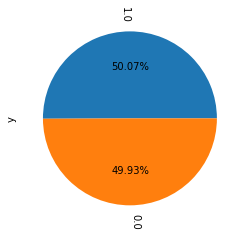

In [8]:
df['y'].value_counts().plot(kind='pie',autopct='%1.2f%%', rotatelabels=True)

Labels are almost perfectly distributed

### EDA

In [9]:
 def distribution_skew_plot(df,num_cols,cols=4,width=15,height=12,tight=True):
        '''
        Find skewness of the numerical data
        args:
            df: pandas dataframe
            num_cols: list of names of numerical cols of the dataframe
            cols: number of columns for the subplots
            PAD: padding for spacing of subplots
            width: width of figure size
            height: figure height
            tight: plt.tight_layout()
        '''
        rows = len(num_cols)//2+1
        f,ax = plt.subplots(nrows=rows,ncols=cols, figsize=(width,height))
        ax = ax.ravel()
        
        i=0
        col_num=0
        while col_num<=len(num_cols)-1:
            column = num_cols[col_num]
            sns.distplot(df[column], fit=norm,ax=ax[i])
            stats.probplot(df[column], plot=ax[i+1])
            i+=2
            col_num+=1
        
        for axis_num in range(i,(cols*rows)): # delete the remaining empty plots
                f.delaxes(ax[axis_num])
        
        if tight:
            plt.tight_layout()
        plt.show()

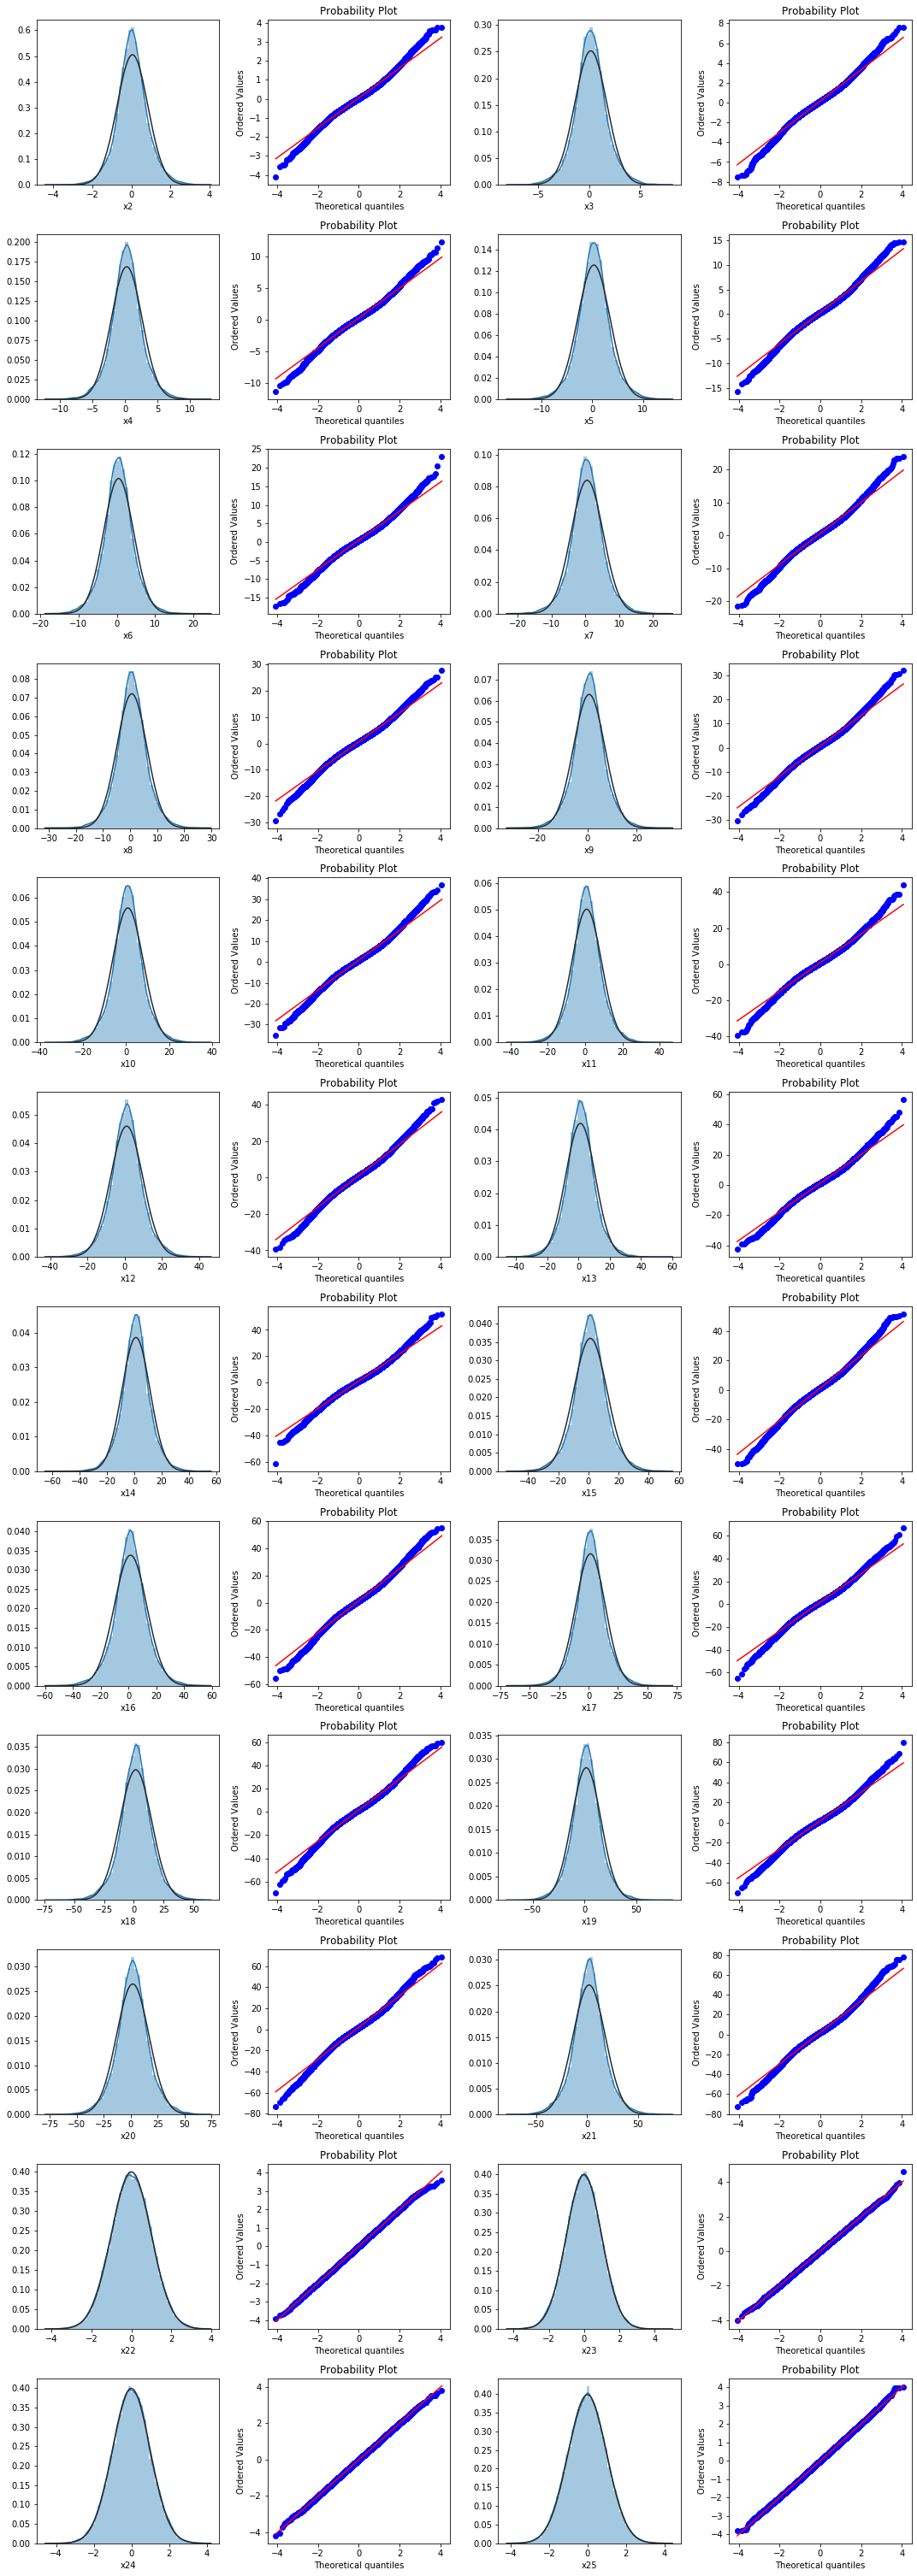

In [10]:
distribution_skew_plot(df,df.drop(['x1','y'],axis=1).columns,width=15,height=45)

Data is almost perfectly normally distributed

In [11]:
def class_distribution_plots(df,cat_col_name,numeric_cols,cols=3,width=12,height=7,tight=False,**kwargs):
    '''
    method to plot the distribution of categories within all of the numerical columns
    args:
        df: pandas dataframe
        cat_col_name: name of the column whose distribution we want to check among all the numreical columns
        numeric_cols: {list} of all  numerical the column names 
        cols: number of graphs to plot per row. default 3
        width: width of plot
        height: height of plot
        tight: plt.tight_layout()
        **kwargs: sns.kdeplot() arguments
    '''

    class_values = df[cat_col_name].value_counts().index.tolist() # unique target classes
    rows = len(numeric_cols)//cols+1
    f,ax = plt.subplots(rows,cols,figsize=(width,height))
    ax = ax.ravel()
    for i,column in enumerate(numeric_cols):
        ax[i].set_xlabel(column)
        for j in class_values:
            sns.kdeplot(df.loc[df[cat_col_name] == j, column], label = f'{cat_col_name} {j}',ax=ax[i],**kwargs)

    for axis_num in range(i+1,(cols*rows)): # delete the remaining empty plots
        f.delaxes(ax[axis_num])

    if tight:
            plt.tight_layout()

    plt.show()  

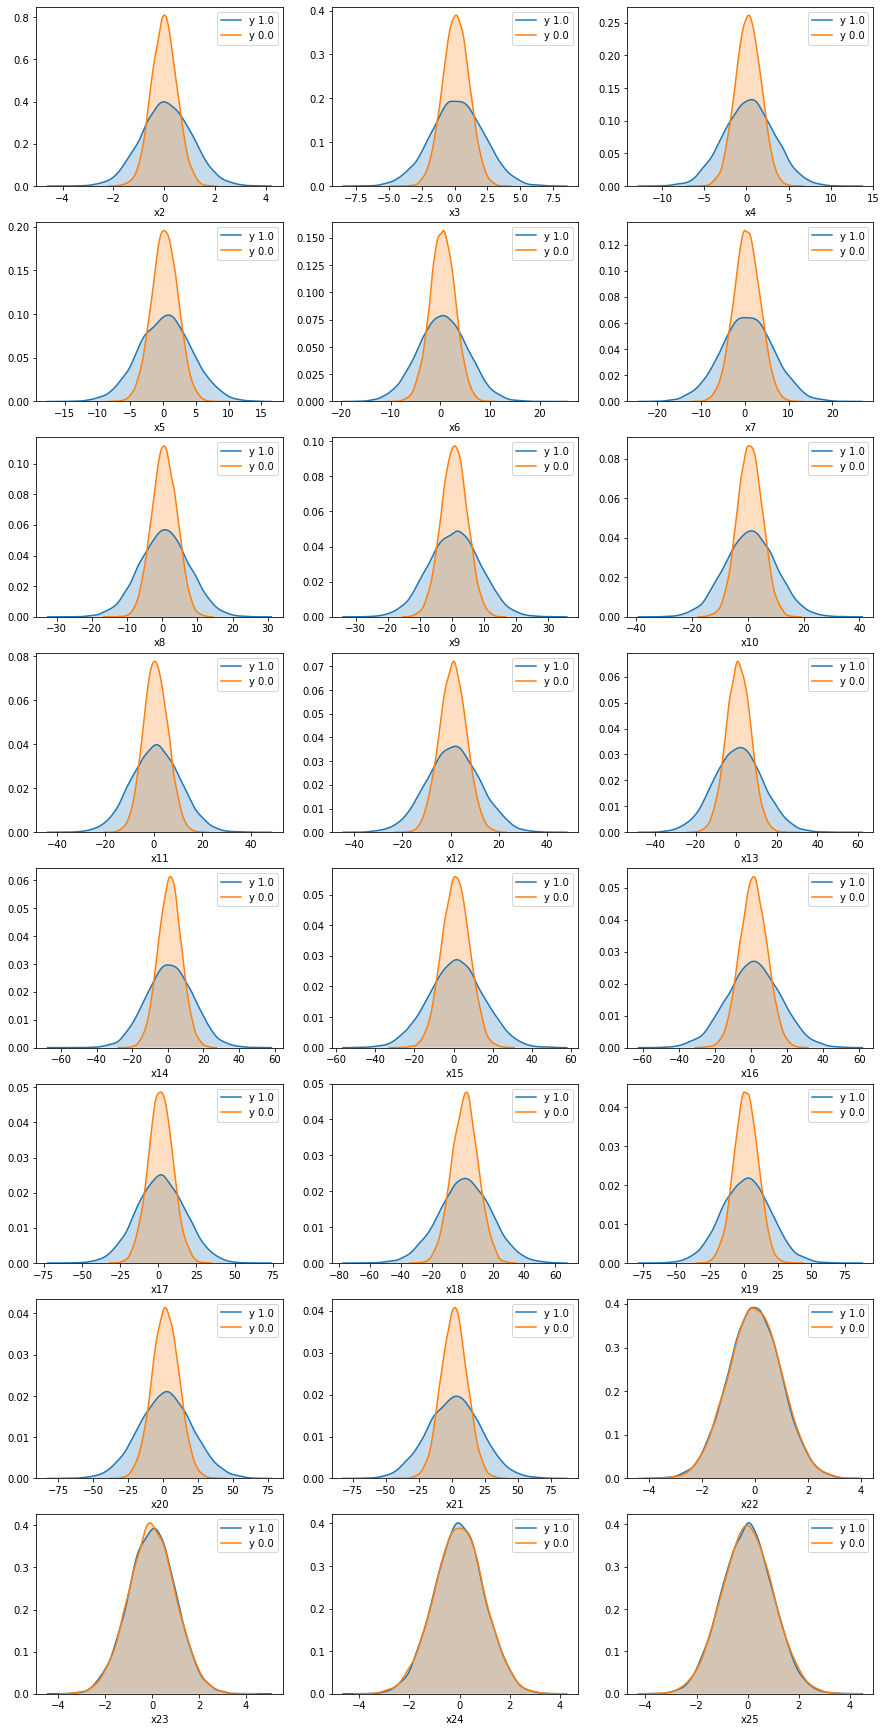

In [12]:
class_distribution_plots(df,'y',df.drop(['x1','y'],axis=1).columns,width=15,height=35,shade=True)

Except x22- x24, variance is high in positive than to the negative cases. Feature x22 to x25 have no difference in class distribution

In [13]:
def box_vio(df,num_cols,cols=4,width=15,height=12,tight=True):
        '''
        plot box and violin plots of numerical plots
        args:
            df: pandas dataframe
            num_cols: list of names of numerical cols of the dataframe
            cols: number of columns for the subplots
            PAD: padding for spacing of subplots
            width: width of figure size
            height: figure height
            tight: plt.tight_layout()
        '''
        rows = len(num_cols)//2+1
        f,ax = plt.subplots(nrows=rows,ncols=cols, figsize=(width,height))
        ax = ax.ravel()
        
        i=0
        col_num=0
        while col_num<=len(num_cols)-1:
            column = num_cols[col_num]
            sns.boxplot(y=df[column],ax=ax[i],color='m')
            ax[i].set_xlabel(column+ ' Box')
            sns.violinplot(y=df[column],ax=ax[i+1],color='teal')
            ax[i+1].set_xlabel(column+ ' Violin')
            i+=2
            col_num+=1
        
        for axis_num in range(i,(cols*rows)): # delete the remaining empty plots
                f.delaxes(ax[axis_num])
        
        if tight:
            plt.tight_layout()
        plt.show()


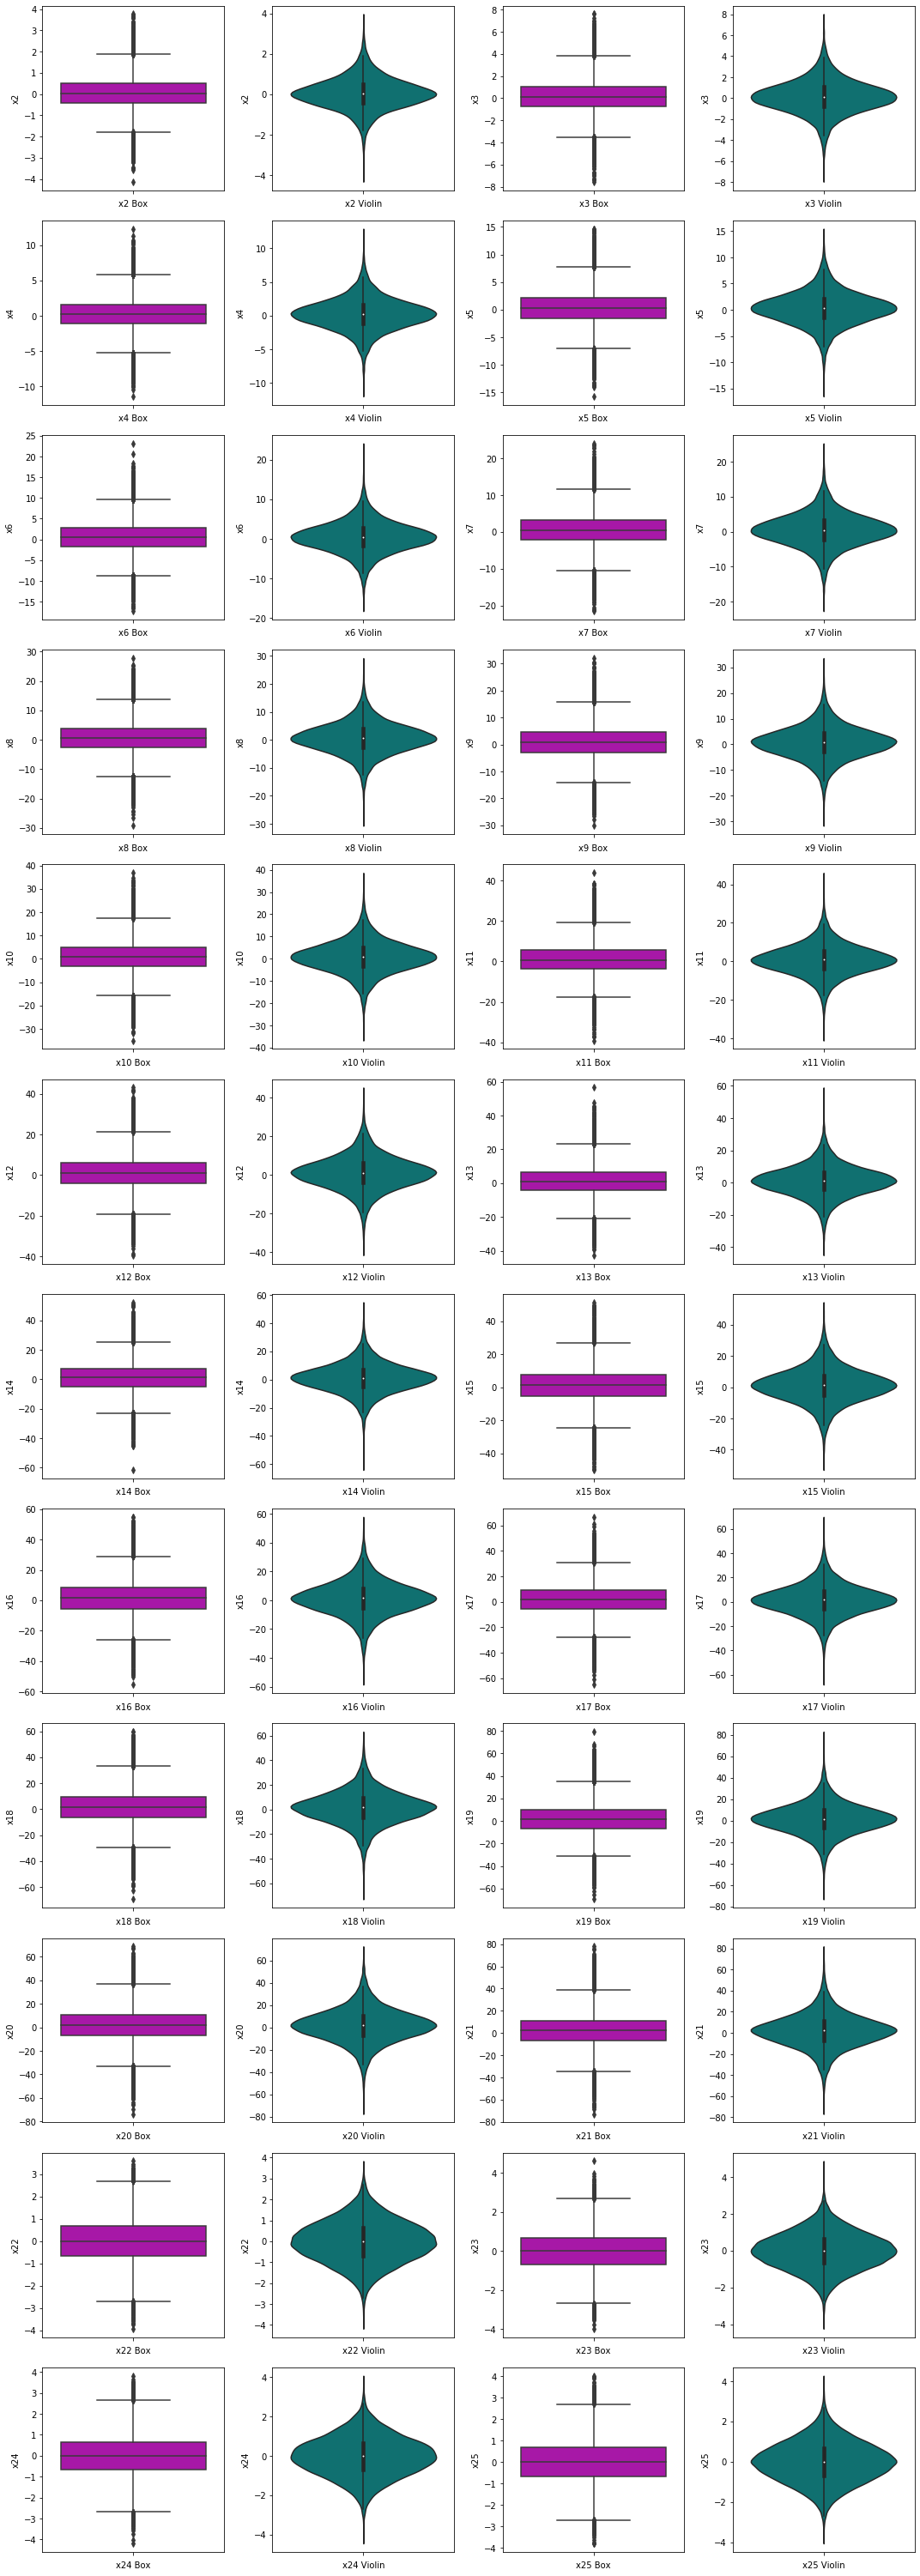

In [14]:
box_vio(df,df.drop(['x1','y'],axis=1).columns, width=15,height=45)

Seems like there are lot of outliers in the categorical data

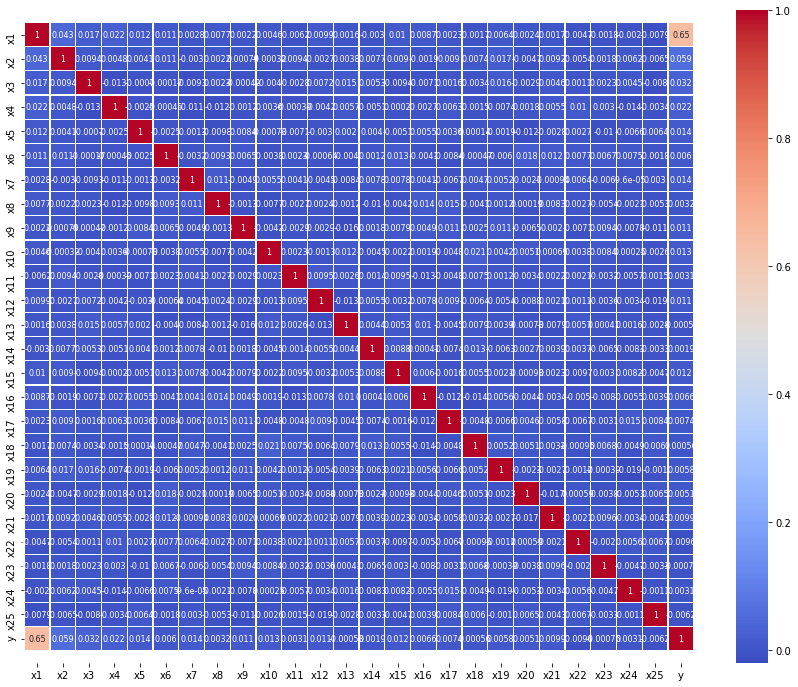

In [15]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,vmax=1,
            annot=True, cmap='coolwarm',facecolor='b',lw=0.1, ax=ax,annot_kws={"fontsize":8})

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

No attribute except x1 has the correlation to Y and no two columns seem to have any correlation to each other

# Q.4

In [16]:
X_train = df.drop(['y'],axis=1).values
cols = df.drop(['y'],axis=1).columns
y_train = df['y'].ravel()

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=SEED, stratify=y,
                                                   #shuffle=True)
    
cv = StratifiedKFold(n_splits=3,random_state=SEED,shuffle=True)

### Pipeline

In [17]:
scaling_method = MinMaxScaler((1,10))

In [18]:
X_train_scaled = scaling_method.fit_transform(X_train)

In [19]:
def pipeline(classif):
    pipe_steps = [('scaler',scaling_method),(type(classif).__name__,classif)]
    pipe_line = Pipeline(pipe_steps)
    return pipe_line

# Q.5

### Random Forest

In [20]:
pipe_line = pipeline(RandomForestClassifier(random_state=SEED))
result = cross_validate(pipe_line, X_train,y_train, cv=cv,
                        scoring=['accuracy','precision','recall','roc_auc'])


result

{'fit_time': array([17.5154984 , 16.9200983 , 17.60030079]),
 'score_time': array([0.36773872, 0.36143708, 0.36163378]),
 'test_accuracy': array([0.9676, 0.9663, 0.9621]),
 'test_precision': array([0.9535154 , 0.94886582, 0.94092988]),
 'test_recall': array([0.98322349, 0.98581985, 0.98621929]),
 'test_roc_auc': array([0.99682925, 0.99556527, 0.99547067])}

In [21]:
feat_imp = pd.DataFrame(index=cols)
feat_imp['importance'] = RandomForestClassifier(random_state=SEED).fit(X_train,y_train).feature_importances_
feat_imp

,importance
x1,0.323743
x2,0.054563
x3,0.050742
x4,0.060529
x5,0.038843
x6,0.022611
x7,0.023485
x8,0.028188
x9,0.032396
x10,0.040720


As in the hypothesis above looking at correlation, x1  has the most value

# Q.6

### Choosing 3 classifiers

In [26]:
classifiers = [LogisticRegression(random_state=SEED),SGDClassifier(random_state=SEED),
               GaussianNB(),SVC(random_state=SEED),KNeighborsClassifier()]


for clf in classifiers:
    pipe_line = pipeline(clf)
    result = cross_validate(pipe_line, X_train,y_train, cv=cv,scoring=['accuracy','precision','recall'])
    acc = result['test_accuracy'].mean()
    # prec = result['test_precision'].mean()
    # rec = result['test_recall'].mean()
    print(f'Mean accuracy for {clf.__class__.__name__} is {acc}')

Mean accuracy for LogisticRegression is 0.8452333333333333
Mean accuracy for SGDClassifier is 0.8011
Mean accuracy for GaussianNB is 0.9880333333333332
Mean accuracy for SVC is 0.9867666666666667
Mean accuracy for KNeighborsClassifier is 0.7071666666666667


In terms of accuracy, we will choose
1. Gaussian
2. SVC
3. Logistic Regression

### Soft Voting Classifier

In [27]:
clf3 = LogisticRegression(random_state=SEED)
clf2 = SVC(random_state=SEED,probability=True)
clf1 = GaussianNB()

soft_voting = VotingClassifier(estimators=[('gauss', clf1), 
                                                 ('svc', clf2),
                                                 ('sgd', clf3)],voting='soft')

In [28]:
pipe_line = pipeline(soft_voting)
result = cross_validate(pipe_line, X_train,y_train, cv=cv,scoring=['accuracy','precision','recall'])
result

{'fit_time': array([21.45786595, 21.31905413, 22.27731752]),
 'score_time': array([0.99764681, 1.00592375, 0.99058223]),
 'test_accuracy': array([0.9876, 0.9854, 0.9851]),
 'test_precision': array([0.98918052, 0.98406692, 0.98232724]),
 'test_recall': array([0.98601957, 0.98681845, 0.98801678])}

In [29]:
result = cross_validate(estimator=soft_voting,X=X_train_scaled,y=y_train,
               cv=cv,scoring=['accuracy','precision','recall'])

# Q.7

In [41]:
roc_auc_scores = []
acc_scores = []
prec_scores = []
rec_scores = []
fitted_classifiers = []
names = []

In [42]:
classifiers = [RandomForestClassifier(random_state=SEED),
               LogisticRegression(random_state=SEED),
               GaussianNB(),
               SVC(random_state=SEED),
               soft_voting]


for clf in classifiers:
    names.append(type(clf).__name__)
    fitted_clf = clf.fit(X_train_scaled,y_train)
    fitted_classifiers.append(fitted_clf)
    
    y_pred = clf.predict(X_train_scaled)
    
    acc = accuracy_score(y_train,y_pred)
    acc_scores.append(acc)
    
    prec = precision_score(y_train,y_pred)
    prec_scores.append(prec)
    
    rec = recall_score(y_train,y_pred)
    rec_scores.append(rec)
    
    roc_auc = roc_auc_score(y_train,y_pred)
    roc_auc_scores.append(roc_auc)

In [43]:
for i in range(len(names)):
    print(f'Recall score for model {names[i]} is: {rec_scores[i]}')
    print(f'Precision score for model {names[i]} is: {prec_scores[i]}')
    print(f'ROC AUC score for model {names[i]} is: {roc_auc_scores[i]}\n')

Recall score for model RandomForestClassifier is: 1.0
Precision score for model RandomForestClassifier is: 1.0
ROC AUC score for model RandomForestClassifier is: 1.0

Recall score for model LogisticRegression is: 0.8954796618068038
Precision score for model LogisticRegression is: 0.8157064887810794
ROC AUC score for model LogisticRegression is: 0.8462978120770451

Recall score for model GaussianNB is: 0.9872178949470741
Precision score for model GaussianNB is: 0.9886
ROC AUC score for model GaussianNB is: 0.9879009562858743

Recall score for model SVC is: 0.9862192929898143
Precision score for model SVC is: 0.9957652752571083
ROC AUC score for model SVC is: 0.9910067023731367

Recall score for model VotingClassifier is: 0.9884162172957859
Precision score for model VotingClassifier is: 0.9876272201157453
ROC AUC score for model VotingClassifier is: 0.9879994164788563



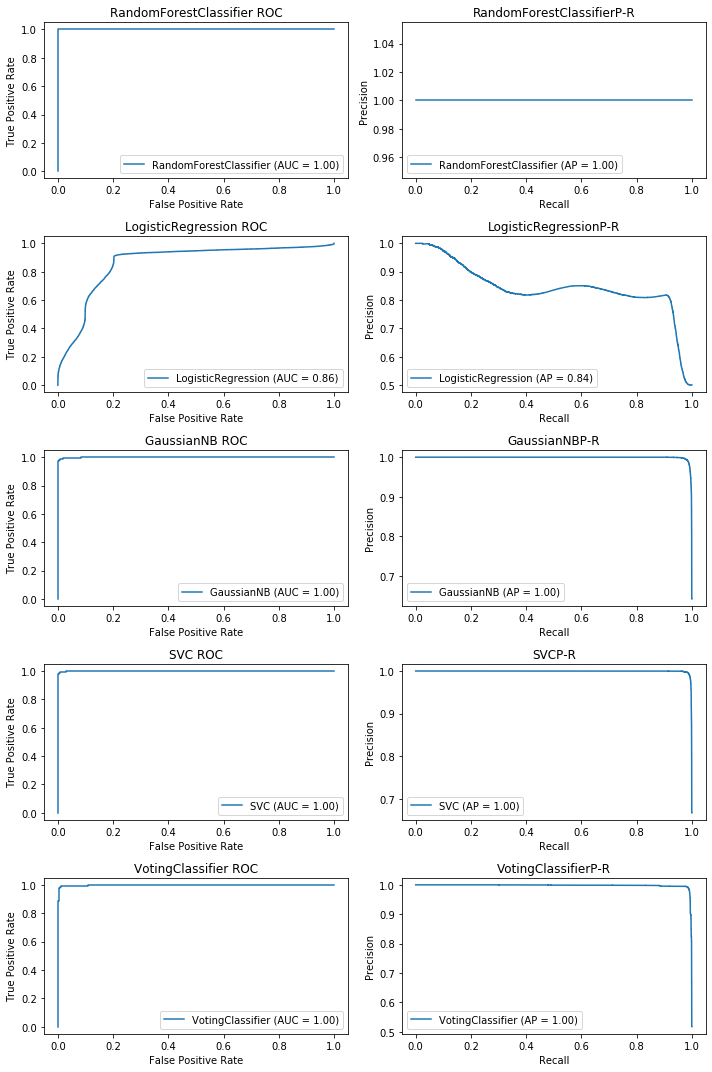

In [44]:
f,ax = plt.subplots(nrows=5,ncols=2,figsize=(10,15))
ax=ax.flatten()
i=0
j=0
for clf in fitted_classifiers:
    plot_roc_curve(clf,X_train_scaled,y_train,ax=ax[i])
    ax[i].set_title(names[j]+' ROC')
    plot_precision_recall_curve(clf,X_train_scaled,y_train,ax=ax[i+1])
    ax[i+1].set_title(names[j]+' Prec-Rec')
    
    i+=2
    j+=1
    plt.tight_layout()

# Q.8

### Choosing a Model and Fine Tuning 